In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-prize-data/combined_data_3.txt
/kaggle/input/netflix-prize-data/movie_titles.csv
/kaggle/input/netflix-prize-data/combined_data_4.txt
/kaggle/input/netflix-prize-data/combined_data_1.txt
/kaggle/input/netflix-prize-data/README
/kaggle/input/netflix-prize-data/probe.txt
/kaggle/input/netflix-prize-data/combined_data_2.txt
/kaggle/input/netflix-prize-data/qualifying.txt


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/kaggle/input/netflix-prize-data/combined_data_1.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

df['Rating'] = df['Rating'].astype(float)

print('Dataset shape: {}'.format(df.shape))
print('-Dataset examples-')
print(df.iloc[::5000000, :])

Dataset shape: (24058263, 2)
-Dataset examples-
          Cust_Id  Rating
0              1:     NaN
5000000   2560324     4.0
10000000  2271935     2.0
15000000  1921803     2.0
20000000  1933327     3.0


In [4]:
df['Rating'] = df['Rating'].astype(float)

print("Statistika za df:")
print(df.describe())



Statistika za df:
             Rating
count  2.405376e+07
mean   3.599634e+00
std    1.086118e+00
min    1.000000e+00
25%    3.000000e+00
50%    4.000000e+00
75%    4.000000e+00
max    5.000000e+00


In [5]:
movie_count = df.isnull().sum()[1]
cust_count = df['Cust_Id'].nunique() - movie_count
rating_count = df['Cust_Id'].count() - movie_count



print(f'df - Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given')

/tmp/ipykernel_388/905829310.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  movie_count = df.isnull().sum()[1]


df - Total pool: 4499 Movies, 470758 customers, 24053764 ratings given


/tmp/ipykernel_388/1647509573.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  movie_count = df.isnull().sum()[1]
/tmp/ipykernel_388/1647509573.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')


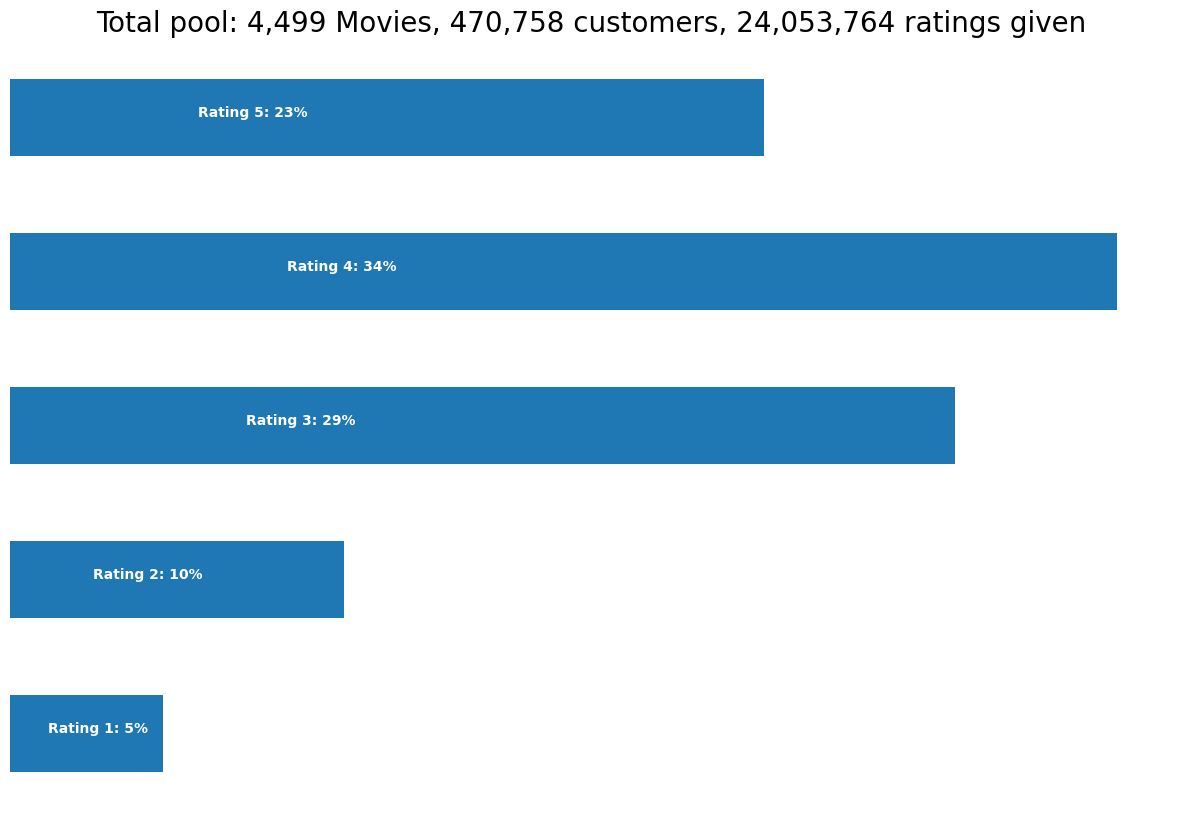

In [6]:
p = df.groupby('Rating')['Rating'].agg(['count'])

movie_count = df.isnull().sum()[1]

cust_count = df['Cust_Id'].nunique() - movie_count

rating_count = df['Cust_Id'].count() - movie_count

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

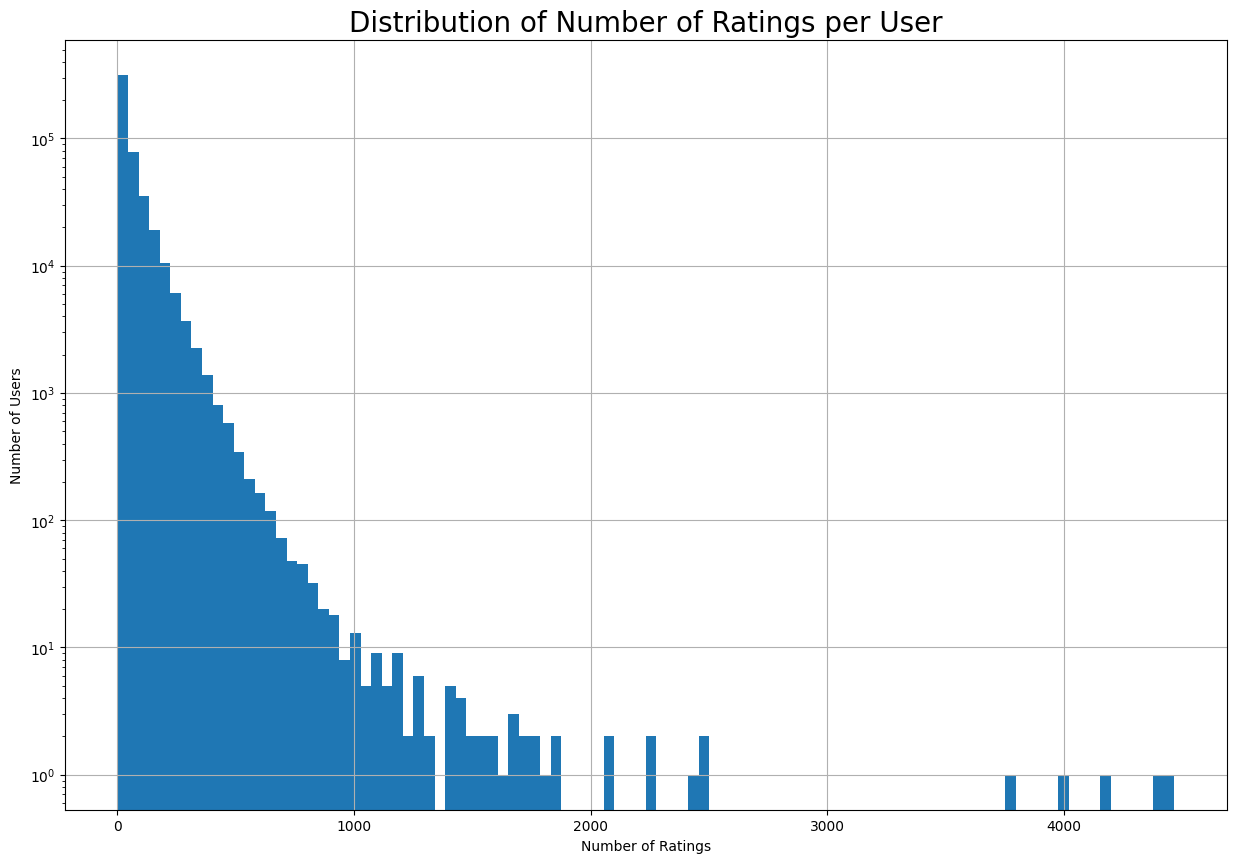

In [7]:
user_rating_counts = df.groupby('Cust_Id').size()
user_rating_counts.hist(bins=100, figsize=(15,10))
plt.title('Distribution of Number of Ratings per User', fontsize=20)
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.yscale('log')
plt.show()

In [8]:
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [9]:
df = df[pd.notnull(df['Rating'])]

df['Movie_Id'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)
print('-Dataset examples-')
print(df.iloc[::5000000, :])

-Dataset examples-
          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
5000996    501954     2.0       996
10001962   404654     5.0      1962
15002876   886608     2.0      2876
20003825  1193835     2.0      3825


In [10]:
user_review_counts = df.groupby('Cust_Id')['Rating'].count()

min_user_reviews = user_review_counts.min()
min_user = user_review_counts[user_review_counts == min_user_reviews].index[0]

print(f'Korisnik sa najmanje recenzija (ID: {min_user}) ima ukupno {min_user_reviews} ocena.')

Korisnik sa najmanje recenzija (ID: 133) ima ukupno 1 ocena.


In [11]:
movie_review_counts = df.groupby('Movie_Id')['Rating'].count()

min_movie_reviews = movie_review_counts.min()
min_movie = movie_review_counts[movie_review_counts == min_movie_reviews].index[0]

print(f'Film sa najmanje ocena (ID: {min_movie}) ima ukupno {min_movie_reviews} ocena.')

Film sa najmanje ocena (ID: 4362) ima ukupno 36 ocena.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


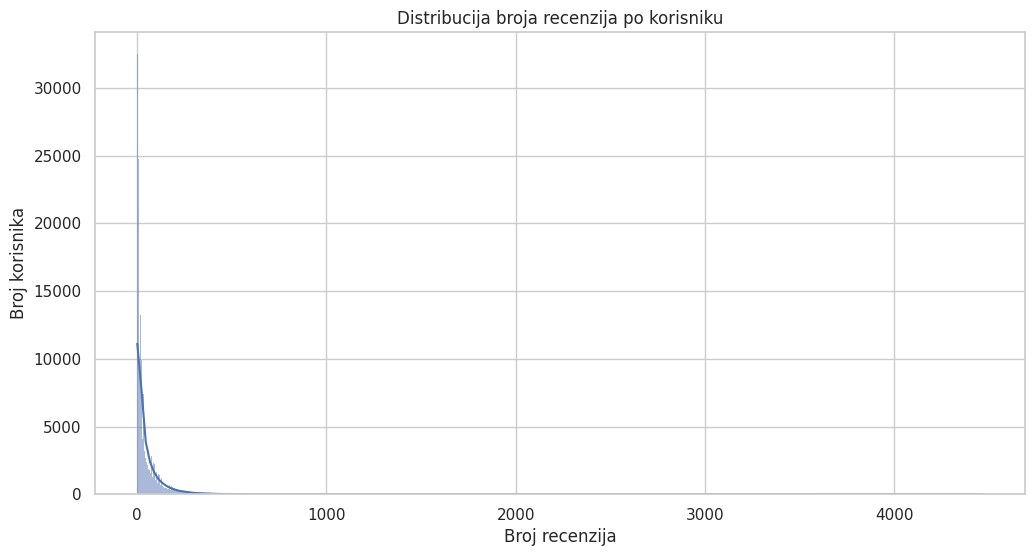

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(user_review_counts , kde=True)
plt.title('Distribucija broja recenzija po korisniku')
plt.xlabel('Broj recenzija')
plt.ylabel('Broj korisnika')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


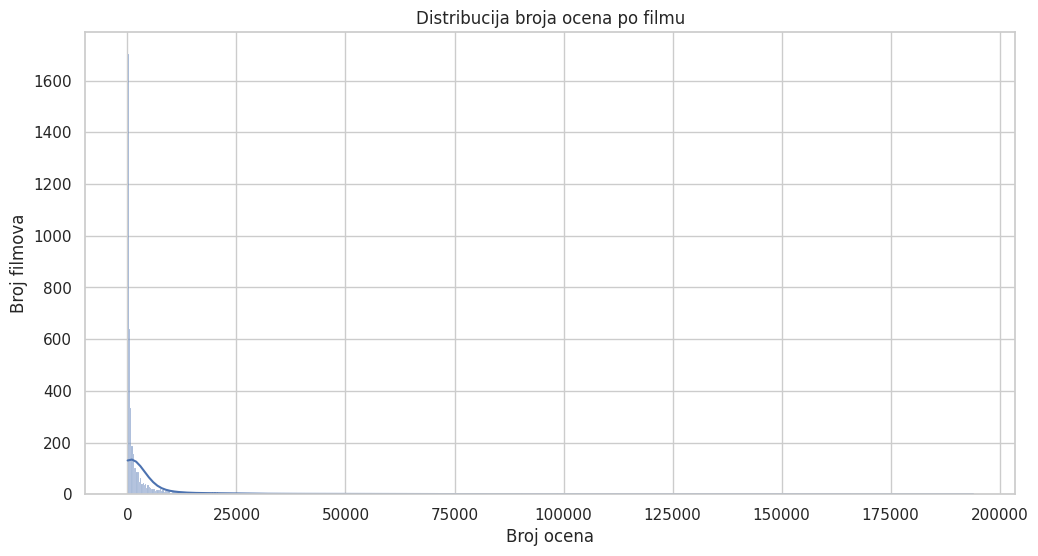

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(movie_review_counts, kde=True)
plt.title('Distribucija broja ocena po filmu')
plt.xlabel('Broj ocena')
plt.ylabel('Broj filmova')
plt.show()

In [14]:
f = ['count','mean']

df_movie_summary = df.groupby('Movie_Id')['Rating'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.7),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

df_cust_summary = df.groupby('Cust_Id')['Rating'].agg(f)
df_cust_summary.index = df_cust_summary.index.map(int)
cust_benchmark = round(df_cust_summary['count'].quantile(0.7),0)
drop_cust_list = df_cust_summary[df_cust_summary['count'] < cust_benchmark].index

print('Customer minimum times of review: {}'.format(cust_benchmark))

Movie minimum times of review: 1799.0
Customer minimum times of review: 52.0


In [15]:
print('Original Shape: {}'.format(df.shape))
df = df[~df['Movie_Id'].isin(drop_movie_list)]
df = df[~df['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(df.shape))
print('-Data Examples-')
print(df.iloc[::5000000, :])

Original Shape: (24053764, 3)
After Trim Shape: (17337458, 3)
-Data Examples-
          Cust_Id  Rating  Movie_Id
696        712664     5.0         3
6932490   1299309     5.0      1384
13860273   400155     3.0      2660
20766530   466962     4.0      3923


In [16]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42, stratify=df['Movie_Id'])

In [17]:
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [18]:
df_p = pd.pivot_table(train_data, values='Rating',index='Cust_Id',columns='Movie_Id')
print(df_p.shape)

print(df_p.head())

(143458, 1350)
Movie_Id  3     8     16    17    18    26    28    30    32    33    ...  \
Cust_Id                                                               ...   
6          NaN   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN   NaN  ...   
7          NaN   5.0   NaN   NaN   NaN   NaN   4.0   5.0   NaN   NaN  ...   
79         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
97         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
134        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

Movie_Id  4472  4474  4478  4479  4485  4488  4490  4492  4493  4496  
Cust_Id                                                               
6          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
7          3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
79         4.0   NaN   NaN   NaN   NaN   NaN   4.0   NaN   NaN   NaN  
97         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
134        NaN   Na

In [19]:
df_p.to_csv('pivot_table.csv')